In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
import pickle
import cv2 
import os

In [6]:
camera_images_path = 'extracted_data\\data'
path_to_parsed_dataset = 'parsed_dataset'

In [7]:
files = list(os.walk(path_to_parsed_dataset))

In [8]:
train_csv, validation_csv, test_csv = files[0][2]

In [9]:
df = pd.read_csv(os.path.join(path_to_parsed_dataset, train_csv))

In [10]:
df

,Unnamed: 0,file_names,coordinates,superclasses,classes,labels
0,0,01/image.001678.jp2,"[1269.3, 220.4, 1377.73, 325.63]",1,17,A31
1,1,02/image.001069.jp2,"[93.1, 43.16, 191.04, 209.33]",1,13,A25
2,2,03/image.001652.jp2,"[1254.21, 110.08, 1335.66, 182.26]",1,17,A31
3,3,03/image.001651.jp2,"[522.7, 109.88, 601.77, 180.23]",1,17,A31
4,4,01/image.003098.jp2,"[1374.9, 150.77, 1458.3, 233.81]",1,12,A23
...,...,...,...,...,...,...
691,691,05/image.000645.jp2,"[1172.89, 320.32, 1213.22, 399.09]",10,87,E9a
692,692,01/image.007244.jp2,"[1120.37, 245.99, 1206.16, 328.14]",-1,-1,einde gebod
693,693,01/image.008054.jp2,"[988.44, 164.62, 1059.87, 277.32]",10,149,F45
694,694,02/image.000034.jp2,"[82.93, 87.68, 150.12, 183.75]",10,149,F45


In [11]:
IM_SIZE = 512

def read_image(file_name):
    sub_df = df[df['file_names'] == file_name]
    
    bounds = []
    labels = []
    file_name = None

    for i in range(len(sub_df)):
        tmp_d = dict(sub_df.iloc[0])
        file_name = tmp_d['file_names'].replace('/', '\\')
        coordinates = eval(tmp_d['coordinates'])
        superclass = tmp_d['superclasses']

        bounds.append(coordinates)
        labels.append(superclass)
        
    im = cv2.imread(os.path.join(camera_images_path, file_name))
    original_width = im.shape[1]
    original_height = im.shape[0]
    
    im = cv2.resize(im, (IM_SIZE, IM_SIZE))
    
    bounds_np = np.array(bounds) # amount_signs, [x1,y1,x2,y2]
    bounds_np[:, 0] = bounds_np[:, 0] / original_width * IM_SIZE
    bounds_np[:, 2] = bounds_np[:, 2] / original_width * IM_SIZE
    bounds_np[:, 1] = bounds_np[:, 1] / original_height * IM_SIZE
    bounds_np[:, 3] = bounds_np[:, 3] / original_height * IM_SIZE
    
    
    return im, np.array(bounds_np).astype(np.int), np.array(labels)
    

C:\Users\Or Dalal\AppData\Local\Temp\ipykernel_3760\990530427.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return im, np.array(bounds_np).astype(np.int), np.array(labels)


[1]


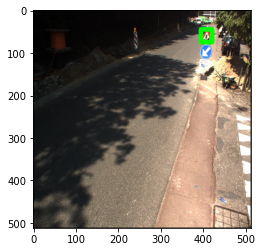

In [12]:
file_name = '03/image.001652.jp2'
image, bounds_arr, labels_arr = read_image(file_name)

print(labels_arr)

for bound in bounds_arr:
    bound = bound.tolist()
    tamrur = cv2.resize(image[bound[1]:bound[3], bound[0]:bound[2]], (400,400))
    cv2.rectangle(image, (bound[0], bound[1]),(bound[2], bound[3]), (0,255,0), 10)
    
    cv2.imshow('a', tamrur)
    cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image[:, :, ::-1])

In [13]:
(bound[0], bound[1]),(bound[2], bound[3])

((394, 45), (420, 75))